## Haberman Cancer Survival Dataset

About : This dataset contains cases of cancer study.The study was conducted between 1958 and 1969 at the University of Chicago's Billings Hospital.The dataset contains the age of patients and the number of nodes found in the patients. It aslo 
records the survival of patients for more than 5 years from the time of surgery for breast cancer in form of 1(for yes) and 2(for no).

## Objective 
 To pridict the survival chances of a patient based on the features provided by the dataset.

In [1]:
#necessary modules 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels import robust as rb
import warnings
warnings.filterwarnings('ignore')

In [2]:
dataframe= pd.read_csv('Haberman.csv', names=['age','op_year','nodes','status'])

### Priliminary analysis

In [3]:
print(dataframe.shape)

(306, 4)


1. Total number of Observations are 305 .
2. Dataset has 4 features attributed to it. 

In [4]:
for col in dataframe.columns.tolist():
    print(col)

age
op_year
nodes
status


The 4 features are 
1. Age of operation.
2. Year of operation.
3. Number of nodes found in the body of patient.
4. Status of survial after 5 years of operation.

In [5]:
dataframe['status']=dataframe['status'].map({1:'Survived',2:'Demised'})
Survived = dataframe.loc[dataframe['status']=='Survived']
Demised = dataframe.loc[dataframe['status']=='Demised']

In [6]:
dataframe.head()

,age,op_year,nodes,status
0,30,64,1,Survived
1,30,62,3,Survived
2,30,65,0,Survived
3,31,59,2,Survived
4,31,65,4,Survived


In [7]:
dataframe.tail()

,age,op_year,nodes,status
301,75,62,1,Survived
302,76,67,0,Survived
303,77,65,3,Survived
304,78,65,1,Demised
305,83,58,2,Demised


In [31]:
#whole data analysis
print(dataframe.describe().transpose())

print('\nNodes\'')
print('Median          {}'.format(np.median(dataframe['nodes'])))
print('MAD             {}'.format(rb.mad(dataframe['nodes'])))
print('90th percentile {}'.format(np.percentile(dataframe["nodes"], 90)))

print('\nAge\'s')
print('Median          {}'.format(np.median(dataframe['age'])))
print('MAD             {}'.format(rb.mad(dataframe['age'])))
print('90th percentile {}'.format(np.percentile(dataframe["age"], 90)))


         count       mean        std   min   25%   50%    75%   max
age      306.0  52.457516  10.803452  30.0  44.0  52.0  60.75  83.0
op_year  306.0  62.852941   3.249405  58.0  60.0  63.0  65.75  69.0
nodes    306.0   4.026144   7.189654   0.0   0.0   1.0   4.00  52.0

Nodes'
Median          1.0
MAD             1.482602218505602
90th percentile 13.0

Age's
Median          52.0
MAD             11.860817748044816
90th percentile 67.0


In [9]:
#Survivors data analysis
print(Survived.describe().transpose())

print('\nNodes\'')
print('Median          {}'.format(np.median(Survived['nodes'])))
print('MAD             {}'.format(rb.mad(Survived['nodes'])))
print('90th percentile {}'.format(np.percentile(Survived["nodes"], 90)))

print('\nAge\'s')
print('Median          {}'.format(np.median(Survived['age'])))
print('MAD             {}'.format(rb.mad(Survived['age'])))
print('90th percentile {}'.format(np.percentile(Survived["age"], 90)))


         count       mean        std   min   25%   50%   75%   max
age      225.0  52.017778  11.012154  30.0  43.0  52.0  60.0  77.0
op_year  225.0  62.862222   3.222915  58.0  60.0  63.0  66.0  69.0
nodes    225.0   2.791111   5.870318   0.0   0.0   0.0   3.0  46.0

Nodes'
Median          0.0
MAD             0.0
90th percentile 8.0

Age's
Median          52.0
MAD             13.343419966550417
90th percentile 67.0


In [10]:
#Decreased data analysis
print(Demised.describe().transpose())

print('\nNodes\'')
print('Median          {}'.format(np.median(Demised['nodes'])))
print('MAD             {}'.format(rb.mad(Demised['nodes'])))
print('90th percentile {}'.format(np.percentile(Demised["nodes"], 90)))

print('\nAge\'s')
print('Median          {}'.format(np.median(Demised['age'])))
print('MAD             {}'.format(rb.mad(Demised['age'])))
print('90th percentile {}'.format(np.percentile(Demised["age"], 90)))


         count       mean        std   min   25%   50%   75%   max
age       81.0  53.679012  10.167137  34.0  46.0  53.0  61.0  83.0
op_year   81.0  62.827160   3.342118  58.0  59.0  63.0  65.0  69.0
nodes     81.0   7.456790   9.185654   0.0   1.0   4.0  11.0  52.0

Nodes'
Median          4.0
MAD             5.930408874022408
90th percentile 20.0

Age's
Median          53.0
MAD             11.860817748044816
90th percentile 67.0


### observations

1. Minimum age of patient is 30 years and max is 83.
2. There are patients with no nodes as well as having as high number of nodes as 52.
3. Survivors had as high as 46 nodes.
4. Decreased even were ones without any nodes.
5. Most of the Survivors and Decreased were below 66.
6. No clear segregating factor yet found.

In [11]:
dataframe['status'].value_counts()

Survived    225
Demised      81
Name: status, dtype: int64

In [12]:
print('Survival rate = {:.2}'.format(dataframe.status[dataframe.status=='Survived'].count()/dataframe['status'].count()))

Survival rate = 0.74


### Observations

This is an Imbalanced Dataset with 74% of Survivors.

## Bivariate analysis



### Pair Plots

						Pair Plots


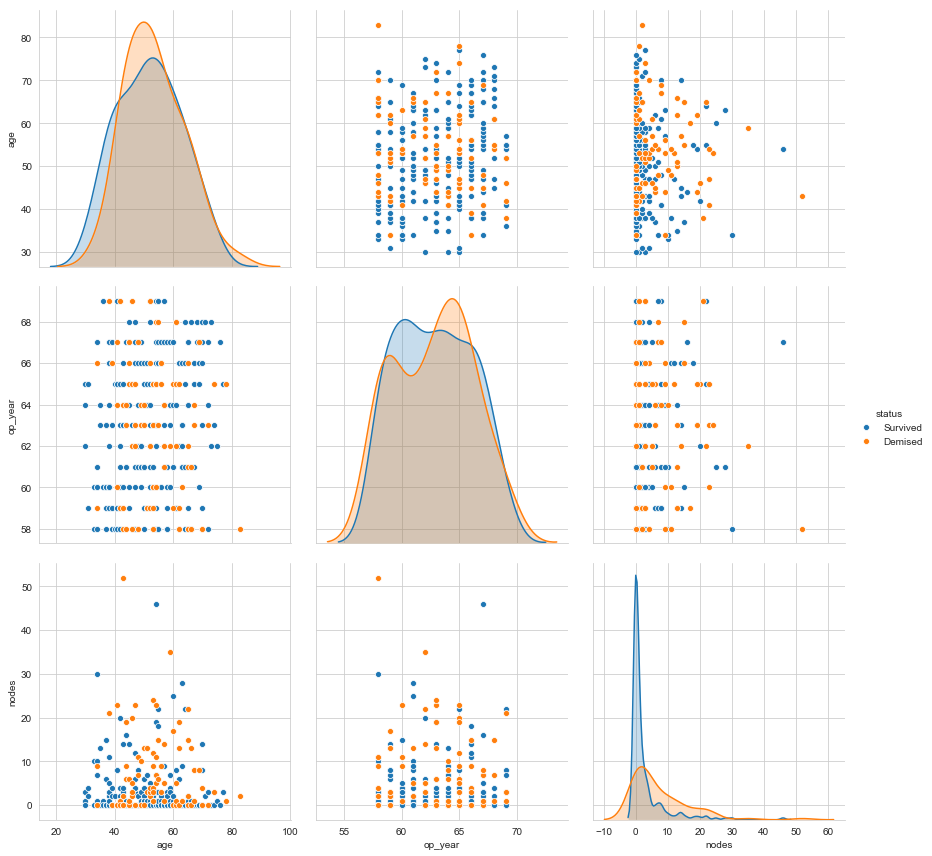

In [13]:
print('\t\t\t\t\t\tPair Plots')
sns.set_style("whitegrid");
sns.pairplot(dataframe, hue="status", size=4);
plt.show();

### Observation
The different bivariate combinations of all feature fail to give a clear demarcation of status of survival of  patients whatsoever. 

## Univariate analysis


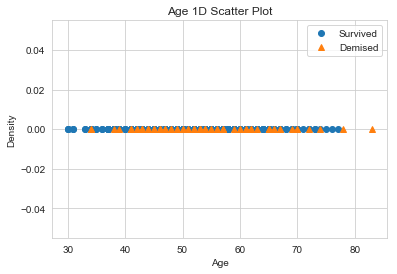

In [14]:
#Age analysis 
plt.plot(Survived['age'],np.zeros_like(Survived['age']),'o')
plt.plot(Demised['age'],np.zeros_like(Demised['age']),'^')
plt.xlabel('Age');
plt.ylabel('Density');
plt.legend(['Survived', 'Demised']);
plt.title('Age 1D Scatter Plot');
plt.show();

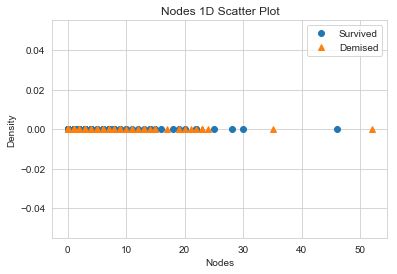

In [15]:
#Nodes analysis
plt.plot(Survived['nodes'],np.zeros_like(Survived['nodes']),'o')
plt.plot(Demised['nodes'],np.zeros_like(Demised['nodes']),'^')
plt.xlabel('Nodes')
plt.ylabel('Density')
plt.legend(['Survived', 'Demised'])
plt.title('Nodes 1D Scatter Plot')
plt.show();

### Histograms


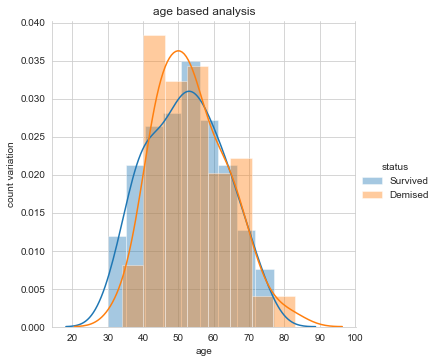

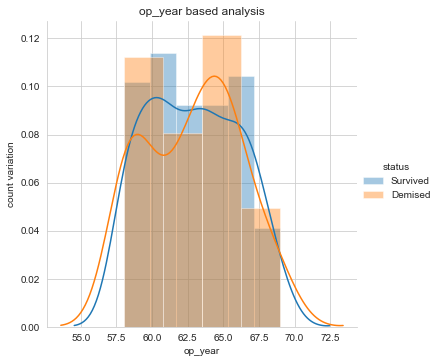

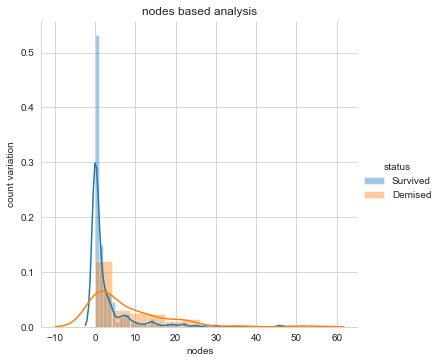

In [16]:
for  index,feature in enumerate(dataframe.columns[:-1].tolist()):
    sns.FacetGrid(dataframe, hue="status", size=5) \
       .map(sns.distplot, feature) \
       .add_legend();
    plt.xlabel(feature)
    plt.ylabel('count variation')
    plt.title('{} based analysis'.format(feature))
    plt.show();



### Observations

1. Patients in age group 30 to 40 have a moderately higher survival rate even if they have a large number of nodes.
2. There was no major advancement in medical practises as no inclanation in dataset towards survival with increment in operation years.
3. When number of nodes is less than 3 the chances of survival is high.


### PDF and CDF

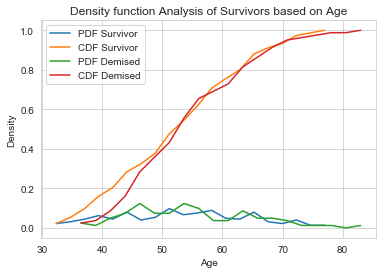

In [17]:
#survival age analysis
counts, bin_edges = np.histogram(Survived['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);




#Decreased age analysis
counts, bin_edges = np.histogram(Demised['age'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);


plt.xlabel('Age');
plt.ylabel('Density');
plt.legend(['PDF Survivor', 'CDF Survivor','PDF Demised', 'CDF Demised']);
plt.title('Density function Analysis of Survivors based on Age');

### observation

1. One is More likely to survive given age is less than 50 as shown by CDF.


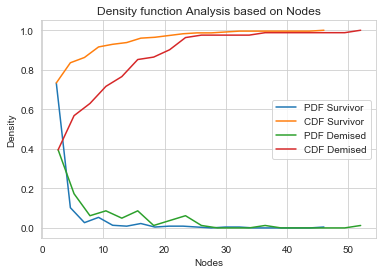

In [18]:
#Survival nodes analysis
counts, bin_edges = np.histogram(Survived['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

#Demised nodes analysis
counts, bin_edges = np.histogram(Demised['nodes'], bins=20, 
                                 density = True)
pdf = counts/(sum(counts))
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf);
plt.plot(bin_edges[1:], cdf);

plt.xlabel('Nodes');
plt.ylabel('Density');
plt.legend(['PDF Survivor', 'CDF Survivor','PDF Demised', 'CDF Demised']);
plt.title('Density function Analysis based on Nodes');
plt.show();


### Observations
1. 90 percent of Decreased have under 20 nodes.
2. 90 percent Suvivors have less than 8 nodes.
3. Age group 30 to 40 have higher rate of survial.
4. Less nodes more chances of survival.
6. Nodes turn out to be more prominent in segregation than Age group.

### Boxplots

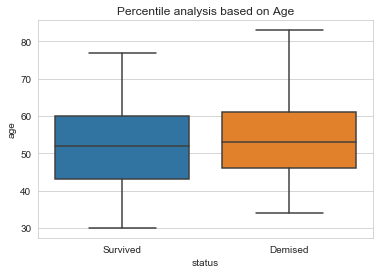

In [19]:
sns.boxplot(x='status', y='age', data= dataframe)
plt.title('Percentile analysis based on Age')
plt.show();

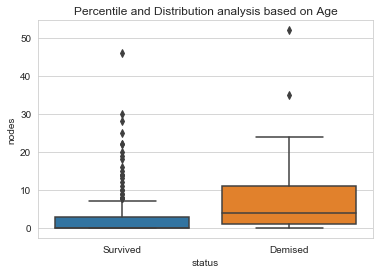

In [20]:
sns.boxplot(x='status', y='nodes', data= dataframe)
plt.title('Percentile and Distribution analysis based on Age')
plt.show();

### Voilin plots

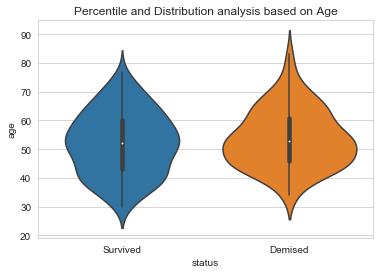

In [21]:
sns.violinplot(x="status", y="age", data=dataframe, size=8)
plt.title('Percentile and Distribution analysis based on Age')
plt.show()

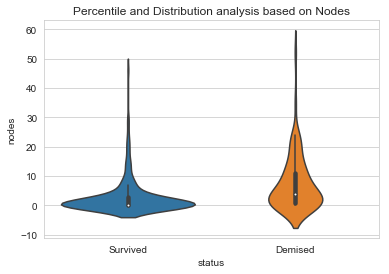

In [22]:
sns.violinplot(x="status", y="nodes", data=dataframe, size=8)
plt.title('Percentile and Distribution analysis based on Nodes')
plt.show()

### Observation
1. With respect to nodes, Survived has more outliers than Demised.

## Contour plots

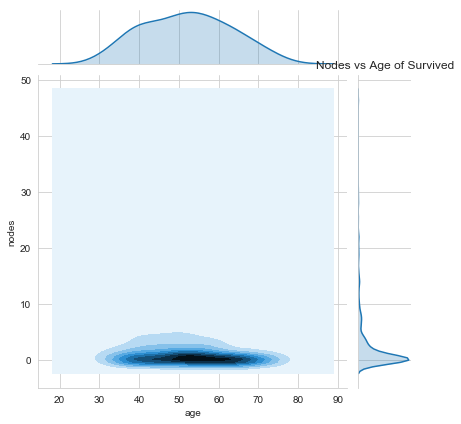

In [26]:
sns.jointplot(x="age",y="nodes",data=Survived,kind='kde')
plt.title('Nodes vs Age of Survived')
plt.show()

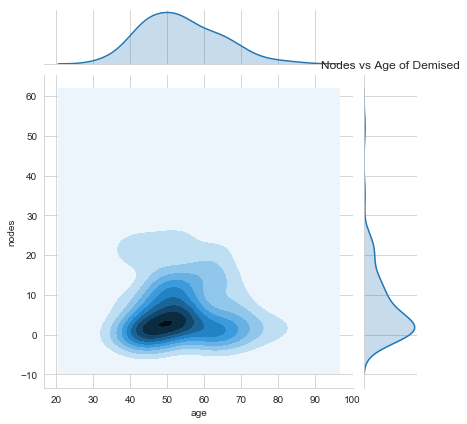

In [25]:
sns.jointplot(x="age",y="nodes",data=Demised,kind='kde')
plt.title('Nodes vs Age of Demised')
plt.show()

### observation

1. Most of the Survivors have likely 0 to 3 nodes. 
2. Most of the Decresed have 0 to 10 nodes.

## Conclusions

-> Survival chances is high anyway with 74% of survivors.

-> Nodes are prominant in Survival chance analysis.

-> One is highly likely to Survive if number of nodes is less than 3.

-> Being in younger side of age group (30 -50) is fitting for survival.

